<div style="text-align: center;">

<h1>How to manage multi-dimensional arrays?</h1>

<img src="https://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png" style="width: 60%" align="middle">
    
<h2>by Agustina Pesce</h2>

<h2>Seminário do Laboratório de Tectonofísica</h2>

    

    
</div>

# Xarray package

## What is Xarray?

* An open source project and Python package

* ``xarray`` makes working with labelled multi-dimensional arrays simple, efficient, and fun!

* It introduces labels in the form of dimensions, coordinates and attributes on NumPy arrays, which allows for a more intuitive, simpler and less error developer experience.

* Is combines the best of [Pandas](https://pandas.pydata.org/), [NumPy](https://numpy.org/), NetCDF and [Dask](https://dask.org/).


## What is Xarray good for?

* Gridded, multi-dimensional and large datasets, commonly used in earth sciences

* Integration with other data analysis packages

* I/O operations (netCDF)

* Plotting



## Data structures
``xarray`` has two data structures:

* __DataArray__ — for a single data variable
* __Dataset__ — a container for multiple DataArrays (data variables)

For __more information__ about ``xarray``:

[Xarray web](https://xarray.pydata.org/en/stable/)

[Fast tutorial](http://pure.iiasa.ac.at/id/eprint/14952/1/xarray-tutorial-egu2017-answers.pdf)

## A Dataset

In [1]:
# Import xarray
import xarray as xr

# RockHound is a Python library to download geophysical models and datasets. 
# It is part of Fatiando Poroject
import rockhound as rh

# To plot
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Change default dpi of matplotlib figures for presentation
rcParams["figure.dpi"] = 120

In [2]:
# Load the grids of the age of the oceanic lithosphere 
grid = rh.fetch_seafloor_age()

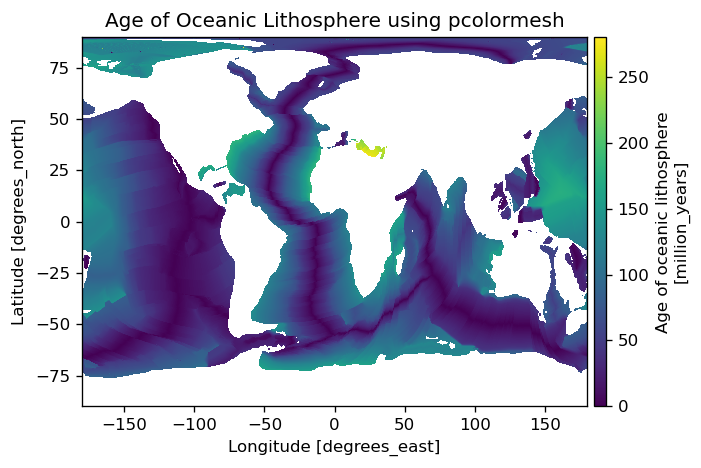

In [3]:
# We're not using a map projection to speed up the plotting but this NOT recommended.
grid.age.plot.pcolormesh(cbar_kwargs=dict(pad=0.01, aspect=30))

plt.gca().set_title("Age of Oceanic Lithosphere using pcolormesh")
plt.tight_layout()

In [4]:
grid

<xarray.Dataset>
Dimensions:      (latitude: 1801, longitude: 3601)
Coordinates:
  * latitude     (latitude) float32 -90.0 -89.9 -89.8 -89.7 ... 89.8 89.9 90.0
  * longitude    (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
Data variables:
    age          (latitude, longitude) float32 nan nan nan ... 55.42 55.42 55.42
    uncertainty  (latitude, longitude) float32 nan nan nan ... 15.0 15.0 15.0
Attributes:
    title:    Age of oceanic lithosphere
    doi:      10.1029/2007GC001743

We can access the ages through the `age` attribute:

In [5]:
grid.age

<xarray.DataArray 'age' (latitude: 1801, longitude: 3601)>
array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [55.57, 55.55, 55.61, ..., 55.56, 55.56, 55.57],
       [55.37, 55.37, 55.36, ..., 55.36, 55.36, 55.36],
       [55.57, 55.57, 55.57, ..., 55.42, 55.42, 55.42]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -90.0 -89.9 -89.8 -89.7 ... 89.8 89.9 90.0
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
Attributes:
    long_name:  Age of oceanic lithosphere
    units:      million_years

A ``xr.Dataset`` is a container of ``xr.DataArray``s

Under the hood, the values are stored as ``np.array``s:

In [7]:
grid.age.values

array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [55.57, 55.55, 55.61, ..., 55.56, 55.56, 55.57],
       [55.37, 55.37, 55.36, ..., 55.36, 55.36, 55.36],
       [55.57, 55.57, 55.57, ..., 55.42, 55.42, 55.42]], dtype=float32)

The best thing about ``xarray`` is the possibility of doing things in a simple way.

For example: 

If you want to **cut the grid** in a defined area using ``Xarray``, you can do it in just **one line** using `sel()` method.

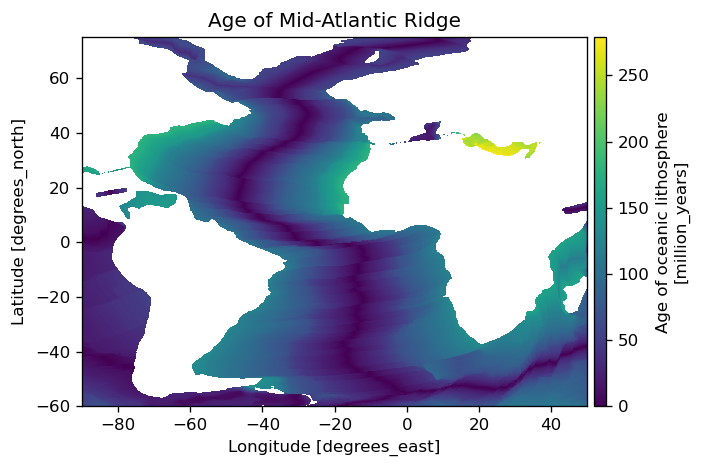

In [6]:
# Cut the grid in the interested area.
cut_grid = grid.sel(longitude=slice(-90, 50), latitude=slice(-60, 75))

# Plot:
cut_grid.age.plot.pcolormesh(cbar_kwargs=dict(pad=0.01, aspect=30))

plt.gca().set_title("Age of Mid-Atlantic Ridge")
plt.tight_layout()

The cut grid is a ``xr.Dataset``:

In [7]:
cut_grid

<xarray.Dataset>
Dimensions:      (latitude: 1351, longitude: 1401)
Coordinates:
  * latitude     (latitude) float32 -60.0 -59.9 -59.8 -59.7 ... 74.8 74.9 75.0
  * longitude    (longitude) float32 -90.0 -89.9 -89.8 -89.7 ... 49.8 49.9 50.0
Data variables:
    age          (latitude, longitude) float32 62.66 62.81 62.96 ... nan nan nan
    uncertainty  (latitude, longitude) float32 1.96 2.1 2.24 ... nan nan nan
Attributes:
    title:    Age of oceanic lithosphere
    doi:      10.1029/2007GC001743

## Save a xr.Dataset

In [17]:
grid.to_netcdf("dataset_age.nc")

__netCDF__ is a binary file format for self-described datasets that originated in the geosciences.
It is supported on almost all platforms, and parsers exist for the vast majority of scientific programming languages.

## More about ``xr.Dataset`` structure

In [8]:
# Tuple of dimension names associated with this data variable array.
grid.age.dims

('latitude', 'longitude')

In [9]:
# String with the unis of the data variable. 
grid.age.units

'million_years'

In [10]:
# Tuple with the shape associated with this data variable array.
grid.age.shape

(1801, 3601)

In [11]:
# Mapping from dimension names to lengths.
grid.dims

Frozen(SortedKeysDict({'longitude': 3601, 'latitude': 1801}))

In [12]:
# Get the point number on an axis
grid.dims["longitude"]

3601

In [13]:
# Dictionary of xarray.DataArray objects corresponding to coordinate variables
grid.coords

Coordinates:
  * latitude   (latitude) float32 -90.0 -89.9 -89.8 -89.7 ... 89.8 89.9 90.0
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.9 180.0

In [14]:
# Dictionary of global attributes on this dataset
grid.attrs

{'title': 'Age of oceanic lithosphere', 'doi': '10.1029/2007GC001743'}

In [15]:
grid.attrs["doi"]

'10.1029/2007GC001743'

On the website of Xarray, you can find other methods and attributes for [Dataset](https://xarray.pydata.org/en/stable/generated/xarray.Dataset.html#xarray.Dataset) and [DataArray](https://xarray.pydata.org/en/stable/generated/xarray.DataArray.html#xarray.DataArray)

### References:

[RockHound](https://www.fatiando.org/rockhound/latest/index.html) is a Python library to download geophysical models and dataset and load them into Python data structures (pandas, numpy, xarray).
It is part of [Fatiando project](https://www.fatiando.org/).

[Xarray](https://xarray.pydata.org/en/stable/)

[Fast tutorial](http://pure.iiasa.ac.at/id/eprint/14952/1/xarray-tutorial-egu2017-answers.pdf)
